In [0]:
"""Zomato Data Set:
Introduction:
The zomato dataset gives information about the Restaurant's,Country and their address,mainly it is having cuisines information and about online delivery and ratings for each restaurant from this data we can analyze where it is having low orders and how many people using online delivery and from which country."""

Out[309]: "Zomato Data Set:\nIntroduction:\nThe zomato dataset gives information about the Restaurant's,Country and their address,mainly it is having cuisines information and about online delivery and ratings for each restaurant from this data we can analyze where it is having low orders and how many people using online delivery and from which country."

In [0]:
from pyspark.sql import SparkSession#importing sparksession
spark = SparkSession.builder.appName("imu").getOrCreate()#creating a spark session

In [0]:
spark#sparksession has created

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
#dbutils.fs.rm('dbfs:/FileStore/tables/Country_Code.xlsx',True)#it will delete the files in the databricks

In [0]:
%fs
ls /FileStore/tables/

path,name,size,modificationTime
dbfs:/FileStore/tables/Air_line_optional.csv,Air_line_optional.csv,11369682,1656528505000
dbfs:/FileStore/tables/Country_Code.csv,Country_Code.csv,237,1673508964000
dbfs:/FileStore/tables/Test_DataMissing.csv,Test_DataMissing.csv,63,1662888685000
dbfs:/FileStore/tables/UIDAI_ENR_DETAIL_20170308.csv,UIDAI_ENR_DETAIL_20170308.csv,46483335,1662892773000
dbfs:/FileStore/tables/airports.csv,airports.csv,16130,1662895783000
dbfs:/FileStore/tables/diabetes.csv,diabetes.csv,23873,1656509112000
dbfs:/FileStore/tables/line_delimitor.txt,line_delimitor.txt,95,1674806596000
dbfs:/FileStore/tables/olympix_data_organized_with_header__2_.csv,olympix_data_organized_with_header__2_.csv,530992,1662895915000
dbfs:/FileStore/tables/zomato.csv,zomato.csv,2257316,1673503019000


In [0]:
#d = spark.read.format("csv").option("header","true").option("mode","DROPMALFORMED").option("inferSchema","true").load("dbfs:/FileStore/tables/zomato.csv")
#display(d)

In [0]:
# Find Count of Null, None, NaN of All DataFrame Columns
#from pyspark.sql.functions import col, when, count
#null_values_count=d.select([count(when(col(c).isNull(), c)).alias(c) for c in d.columns])
#display(null_values_count)

In [0]:
#d.printSchema()

In [0]:
#Reading the file with using encoding
df=spark.read.csv('dbfs:/FileStore/tables/zomato.csv',header=True,sep=",",inferSchema=True,encoding='ISO-8859-1')
#display(df)#it will show the all the records with columns

In [0]:
display(df.printSchema())#it will display all the data types with all columns

root
 |-- Restaurant ID: string (nullable = true)
 |-- Restaurant Name: string (nullable = true)
 |-- Country Code: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Locality: string (nullable = true)
 |-- Locality Verbose: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Cuisines: string (nullable = true)
 |-- Average Cost for two: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Has Table booking: string (nullable = true)
 |-- Has Online delivery: string (nullable = true)
 |-- Is delivering now: string (nullable = true)
 |-- Switch to order menu: string (nullable = true)
 |-- Price range: string (nullable = true)
 |-- Aggregate rating: string (nullable = true)
 |-- Rating color: string (nullable = true)
 |-- Rating text: string (nullable = true)
 |-- Votes: integer (nullable = true)



In [0]:
# Find Count of Null, None, NaN of All DataFrame Columns
from pyspark.sql.functions import col, when, count
null_values_count=df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
display(null_values_count)

Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,0,0,0,6,6,6,6,15,6,6,6,6,6,6,6,8,8,10,12


In [0]:
type(df)

Out[319]: pyspark.sql.dataframe.DataFrame

In [0]:
df.count()# there are total 9557 records

Out[320]: 9557

In [0]:
len(df.columns)#there are 21 columns

Out[321]: 21

In [0]:
a=df.summary()
display(a)#it will shows all statistical data 

summary,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9557,9557,9557,9557,9557,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551,9549,9549,9547,9545
mean,9051128.349178096,12212.0,18.365616165846507,90.607226,14.923160398999999,66.26348823500001,100.53741610333334,64.1103846947421,25.93950432841693,550.0,1199.718910424306,null,2.5,1.6,2.0,2.85,1.8073096659336056,2.666621267679415,78.0,3.5,156.98816134101625
stddev,8791521.28210426,null,56.75054560094658,18.712787590293484,19.28008168458414,15.286569967355936,101.74182830528592,41.47598267276749,13.564415107541473,70.71067811865476,16126.235548234079,null,2.1213203435596424,2.2627416997969525,0.0,0.9848857801796105,0.9506821677798912,1.5162747153999003,93.33809511662427,4.949747468305833,430.2910645319932
min,Station,Let's Burrrp,"Gurgaon""","New Delhi""","1 & 2, Block A-5 B, DDA Market, Paschim Vihar, New Delhi","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",-0.076580556,-15.720118,500,0,Botswana Pula(P),1,0,2,2,0,0,12,0,0
25%,301932.0,12212.0,1.0,77.375287,1.290083898,55.45425095,28.45938349,77.0813133,28.4787425,500.0,250.0,null,1.0,0.0,2.0,2.0,1.0,2.5,12.0,0.0,5
50%,6004011.0,12212.0,1.0,77.375287,1.290083898,55.45425095,77.0875177,77.191948,28.5705071,500.0,400.0,null,1.0,0.0,2.0,2.0,2.0,3.2,12.0,0.0,31
75%,1.8352288E7,12212.0,1.0,103.839165,28.5562369,77.07272552,95.0,77.28182551,28.6427806,600.0,700.0,null,4.0,3.2,2.0,3.6,2.0,3.7,144.0,7.0,131
max,Univercity City Road,íukuraÛôa SofrasÛ±,"Sector 49, Noida",ÛÁstanbul,"íìmitkí_y Mahallesi, 2432. Cadde (8. Cadde), No 113, íankaya, Ankara",íìmitkí_y,"íìmitkí_y, Ankara","Italian, Pizza","North Indian, Chinese, Mughlai","World Cuisine, Patisserie, Cafe",No,Yes,Yes,Yes,Yes,Not rated,Yellow,White,Yellow,Very Good,10934


In [0]:
display(df.describe())#it will shows all statistical data 

summary,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9557,9557,9557,9557,9557,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551,9549,9549,9547,9545
mean,9051128.349178096,12212.0,18.365616165846507,90.607226,14.923160398999999,66.26348823500001,100.53741610333334,64.1103846947421,25.93950432841693,550.0,1199.718910424306,null,2.5,1.6,2.0,2.85,1.8073096659336056,2.666621267679415,78.0,3.5,156.98816134101625
stddev,8791521.28210426,null,56.75054560094658,18.712787590293484,19.28008168458414,15.286569967355936,101.74182830528592,41.47598267276749,13.564415107541473,70.71067811865476,16126.235548234079,null,2.1213203435596424,2.2627416997969525,0.0,0.9848857801796105,0.9506821677798912,1.5162747153999003,93.33809511662427,4.949747468305833,430.2910645319932
min,Station,Let's Burrrp,"Gurgaon""","New Delhi""","1 & 2, Block A-5 B, DDA Market, Paschim Vihar, New Delhi","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",-0.076580556,-15.720118,500,0,Botswana Pula(P),1,0,2,2,0,0,12,0,0
max,Univercity City Road,íukuraÛôa SofrasÛ±,"Sector 49, Noida",ÛÁstanbul,"íìmitkí_y Mahallesi, 2432. Cadde (8. Cadde), No 113, íankaya, Ankara",íìmitkí_y,"íìmitkí_y, Ankara","Italian, Pizza","North Indian, Chinese, Mughlai","World Cuisine, Patisserie, Cafe",No,Yes,Yes,Yes,Yes,Not rated,Yellow,White,Yellow,Very Good,10934


In [0]:
country_code = spark.read.csv("dbfs:/FileStore/tables/Country_Code.csv",header=True,sep=",",inferSchema=True,encoding='ISO-8859-1')

In [0]:
new_df = df.join(country_code,"Country Code","left")#joining the two dataframes

In [0]:
#display(new_df)#displaying the new data frames

In [0]:
new_df.count()#it will shows the records 9557 

Out[327]: 9557

In [0]:
# Find Count of Null, None, NaN of All DataFrame Columns
from pyspark.sql.functions import col, when, count
null_values_count=new_df.select([count(when(col(c).isNull(), c)).alias(c) for c in new_df.columns])
display(null_values_count)

Country Code,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0,0,0,0,6,6,6,6,15,6,6,6,6,6,6,6,8,8,10,12,6


In [0]:
new= new_df.filter(new_df["Average Cost for two"].isNull())
display(new)

Country Code,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
184,18482938,Super Loco,Singapore,The Quayside,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,Singapore
214,5602884,Sis Burger,Sharjah,"Behind ADNOC Petrol Station,",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,UAE
1,308997,Crust Bistro,Gurgaon,"Food Court, HUDA City Center Metro",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,India
1,18312564,Da Pizza Corner,New Delhi,"Rz-36A, Raj Nagar Part 1,",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,India
1,18380150,Essen Foods,Noida,"Shop 20, Ashirwad Complex, Opposite Pathway",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,India
1,18419113,Shaivi's Kitchen,Noida,"Hindon Vihar, Sector 49, Noida",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,India


In [0]:
 new_df = new_df.dropna()#it will drop all null values from data

In [0]:
from pyspark.sql.functions import col, when, count
null_values_count=new_df.select([count(when(col(c).isNull(), c)).alias(c) for c in new_df.columns])
display(null_values_count)#checking out the null values

Country Code,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
new.printSchema()

root
 |-- Country Code: string (nullable = true)
 |-- Restaurant ID: string (nullable = true)
 |-- Restaurant Name: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Locality: string (nullable = true)
 |-- Locality Verbose: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Cuisines: string (nullable = true)
 |-- Average Cost for two: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Has Table booking: string (nullable = true)
 |-- Has Online delivery: string (nullable = true)
 |-- Is delivering now: string (nullable = true)
 |-- Switch to order menu: string (nullable = true)
 |-- Price range: string (nullable = true)
 |-- Aggregate rating: string (nullable = true)
 |-- Rating color: string (nullable = true)
 |-- Rating text: string (nullable = true)
 |-- Votes: integer (nullable = true)
 |-- Country: string (nullable = true)



In [0]:
#display(new_df)#it observed that the data types are not correct

In [0]:
from pyspark.sql.types import IntegerType,FloatType#changing the data types
new_df = new_df.withColumn("Average Cost for two",new_df["Average Cost for two"].cast(IntegerType()))
new_df = new_df.withColumn("Price range",new_df["Price range"].cast("int"))
new_df = new_df.withColumn("Aggregate rating",new_df["Aggregate rating"].cast("float"))
new_df = new_df.withColumn("Votes",new_df["Votes"].cast("int"))
new_df = new_df.withColumn("Restaurant ID",new_df["Restaurant ID"].cast("int"))

In [0]:
new_df.printSchema()#here as we can see that all the data types has been changed 

root
 |-- Country Code: string (nullable = true)
 |-- Restaurant ID: integer (nullable = true)
 |-- Restaurant Name: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Locality: string (nullable = true)
 |-- Locality Verbose: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Cuisines: string (nullable = true)
 |-- Average Cost for two: integer (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Has Table booking: string (nullable = true)
 |-- Has Online delivery: string (nullable = true)
 |-- Is delivering now: string (nullable = true)
 |-- Switch to order menu: string (nullable = true)
 |-- Price range: integer (nullable = true)
 |-- Aggregate rating: float (nullable = true)
 |-- Rating color: string (nullable = true)
 |-- Rating text: string (nullable = true)
 |-- Votes: integer (nullable = true)
 |-- Country: string (nullable = true)



In [0]:
display(new_df.describe())

summary,Country Code,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536,9536
mean,18.148489932885905,9040652.989513423,12212.0,null,null,null,null,64.2663412942809,25.850036308242068,null,1200.835465604027,null,null,null,null,null,1.804739932885906,2.6654886727865112,null,null,156.85046140939596,null
stddev,56.4070770069804,8792119.401156059,null,null,null,null,null,41.20761662253338,11.010546337370597,null,16133.803468423617,null,null,null,null,null,0.9055226325574585,1.5164849198596038,null,null,430.32539471174465,null
min,1,53,Let's Burrrp,Abu Dhabi,"1 & 2, Block A-5 B, DDA Market, Paschim Vihar, New Delhi","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",-0.076580556,-15.720118,Afghani,0,Botswana Pula(P),No,No,No,No,1,0.0,Dark Green,Average,0,Australia
max,94,18500652,íukuraÛôa SofrasÛ±,ÛÁstanbul,"íìmitkí_y Mahallesi, 2432. Cadde (8. Cadde), No 113, íankaya, Ankara",íìmitkí_y,"íìmitkí_y, Ankara",91.806493,9.991702778,"World Cuisine, Patisserie, Cafe",800000,Turkish Lira(TL),Yes,Yes,Yes,No,4,4.9,Yellow,Very Good,10934,United States


In [0]:
#display(new_df)

In [0]:
df.select("Country Code","City").show(n=10)

+------------+----------------+
|Country Code|            City|
+------------+----------------+
|         162|     Makati City|
|         162|     Makati City|
|         162|Mandaluyong City|
|         162|Mandaluyong City|
|         162|Mandaluyong City|
|         162|Mandaluyong City|
|         162|      Pasay City|
|         162|      Pasay City|
|         162|      Pasay City|
|         162|      Pasig City|
+------------+----------------+
only showing top 10 rows



In [0]:
#it will shows the Top 10 Cities who ordered the Most

In [0]:
from pyspark.sql.functions import *
new_df.groupby("City").count().withColumnRenamed("count","Top_Cities_Count").orderBy(col("count").desc()).limit(10).show()

+------------+----------------+
|        City|Top_Cities_Count|
+------------+----------------+
|   New Delhi|            5472|
|     Gurgaon|            1117|
|       Noida|            1078|
|   Faridabad|             251|
|   Ghaziabad|              25|
|     Lucknow|              21|
|   Ahmedabad|              21|
|    Amritsar|              21|
|Bhubaneshwar|              21|
|    Guwahati|              21|
+------------+----------------+



In [0]:
#display(new_df)

In [0]:
#Changing into table
new_df.createTempView("v")

In [0]:
#using sql writing the table
spark.sql("select City,Address,Cuisines,`Average Cost for two`,Currency,`Aggregate rating`,count(*) as count_of from v group by City,Address,Cuisines,`Average Cost for two`,Currency,`Aggregate rating` order by count_of desc").show()

+----------------+--------------------+--------------------+--------------------+------------------+----------------+--------+
|            City|             Address|            Cuisines|Average Cost for two|          Currency|Aggregate rating|count_of|
+----------------+--------------------+--------------------+--------------------+------------------+----------------+--------+
|       New Delhi|19, Ansari Road, ...|         Finger Food|                2000|Indian Rupees(Rs.)|             0.0|       3|
|       New Delhi|34, Rahendra Bhav...|           Fast Food|                 500|Indian Rupees(Rs.)|             0.0|       2|
|       New Delhi|Vardhman Central ...|        North Indian|                 200|Indian Rupees(Rs.)|             0.0|       2|
|Mandaluyong City|Edsa Shangri-La, ...|Seafood, Asian, F...|                4000|  Botswana Pula(P)|             4.4|       1|
|          Albany|2726 Ledo Rd Ste ...|Coffee and Tea, S...|                  10|         Dollar($)|           

In [0]:
new_df.columns

Out[344]: ['Country Code',
 'Restaurant ID',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [0]:
import matplotlib.pyplot as plt

In [0]:
country_index=new_df.toPandas()['Country'].value_counts().index.tolist()

In [0]:
country_index

Out[347]: ['India',
 'United States',
 'United Kingdom',
 'Brazil',
 'South Africa',
 'UAE',
 'New Zealand',
 'Turkey',
 'Australia',
 'Phillipines',
 'Indonesia',
 'Qatar',
 'Sri Lanka',
 'Singapore',
 'Canada']

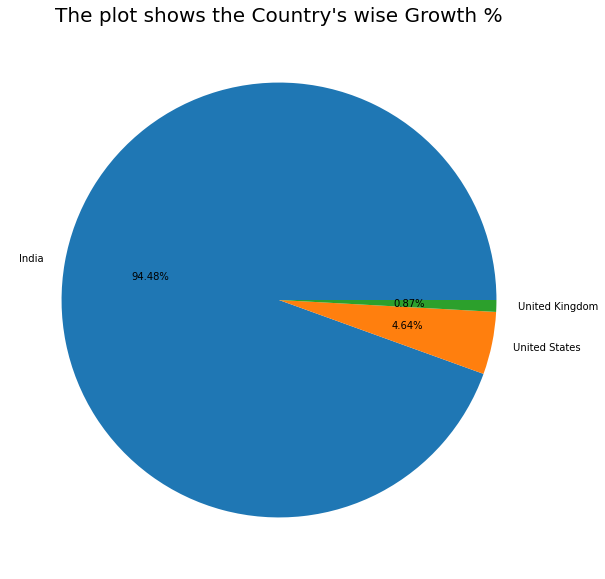

In [0]:
country_index=new_df.toPandas()['Country'].value_counts().index.tolist()#It is converting into pandas of sports column
country_values=new_df.toPandas()['Country'].value_counts().values.tolist()#It is converting into pandas of Total_no_of_medals column
plt.figure(figsize=(25,10))#It returns the figuresize of the plot
plt.title("The plot shows the Country's wise Growth %",fontsize=20)
plt.pie(country_values[:3],labels=country_index[:3],autopct="%1.2f%%")
plt.show()#It shows the plot

In [0]:
"""
Observations:
1. Zomato maximum records or transcation from India after United States and then after united kingdom.
"""

Out[349]: '\nObservations:\n1. Zomato maximum records or transcation from India after United States and then after united kingdom.\n'

In [0]:
new_df.columns

Out[350]: ['Country Code',
 'Restaurant ID',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [0]:
ratings = new_df.groupBy(['Aggregate rating','Rating color', 'Rating text']).count().withColumnRenamed("Count","Rating_Count")

In [0]:
ratings.show(n=10)

+----------------+------------+-----------+------------+
|Aggregate rating|Rating color|Rating text|Rating_Count|
+----------------+------------+-----------+------------+
|             3.2|      Orange|    Average|         521|
|             3.7|      Yellow|       Good|         427|
|             4.6|  Dark Green|  Excellent|          78|
|             2.0|         Red|       Poor|           7|
|             3.3|      Orange|    Average|         483|
|             2.3|         Red|       Poor|          47|
|             2.1|         Red|       Poor|          15|
|             1.8|         Red|       Poor|           1|
|             4.8|  Dark Green|  Excellent|          25|
|             4.0|       Green|  Very Good|         266|
+----------------+------------+-----------+------------+
only showing top 10 rows



In [0]:
"""
Observations:
1. When the rating is between 4.5 to 4.9----->excellent

2. When the rating is between 4.0 to 4.4----->Very Good

3. When the rating is between 3.5 to 3.9------>Good

4. When the rating is between 2.5 to 3.4------>Average

5. When the rating is between 1.8 to 2.4------>poor

6. When the rating is zero---->Not Rated
"""

Out[353]: '\nObservations:\n1. When the rating is between 4.5 to 4.9----->excellent\n\n2. When the rating is between 4.0 to 4.4----->Very Good\n\n3. When the rating is between 3.5 to 3.9------>Good\n\n4. When the rating is between 2.5 to 3.4------>Average\n\n5. When the rating is between 1.8 to 2.4------>poor\n\n6. When the rating is zero---->Not Rated\n'

In [0]:
to_dataframe_ratings = ratings.toPandas()

In [0]:
#to_dataframe_ratings

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

Out[357]: <AxesSubplot:xlabel='Aggregate rating', ylabel='Rating_Count'>

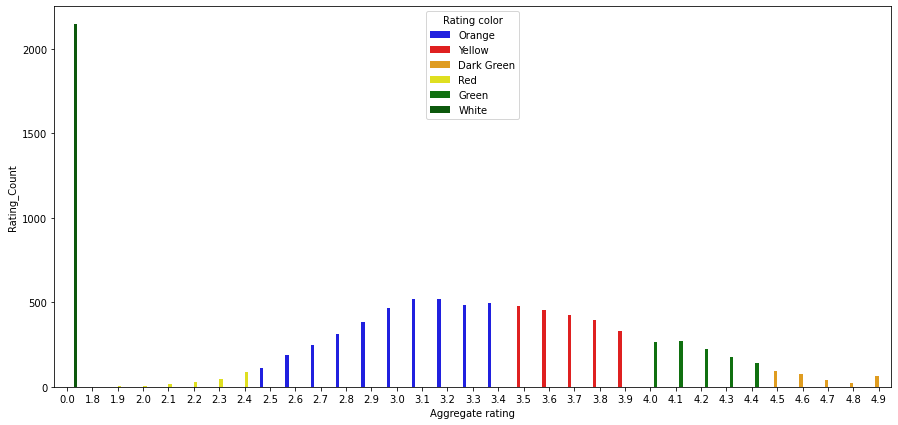

In [0]:
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(x="Aggregate rating",y="Rating_Count",hue="Rating color",data=to_dataframe_ratings,palette=['blue','red','orange','yellow','green','darkgreen'])

In [0]:
"""
Observations:
1. Not Rated has the highest count
2. Maxinum number of rating is between 2.4 to 3.4
"""

Out[358]: '\nObservations:\n1. Not Rated has the highest count\n2. Maxinum number of rating is between 2.4 to 3.4\n'

Out[359]: <AxesSubplot:xlabel='Rating color', ylabel='count'>

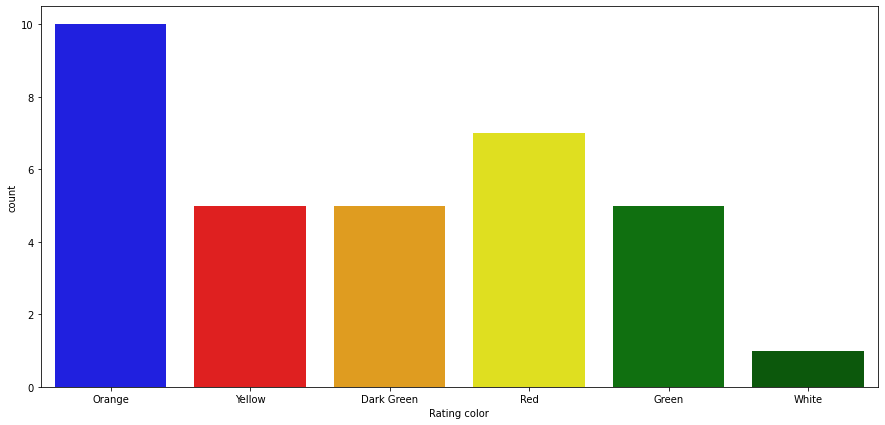

In [0]:
sns.countplot(x='Rating color',data=to_dataframe_ratings,palette=['blue','red','orange','yellow','green','darkgreen'])

In [0]:
"""
Observation:
1. Maximum number zero of ratings are from indian Customers
"""

Out[360]: '\nObservation:\n1. Maximum number zero of ratings are from indian Customers\n'

In [0]:
new_df.columns

Out[361]: ['Country Code',
 'Restaurant ID',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [0]:
country_name = new_df.filter(new_df['Aggregate rating']==0.0)

In [0]:
#display(country_name)

In [0]:
country_names = country_name.groupby(['Country','Aggregate rating']).count().withColumnRenamed("count","Rating_count")

In [0]:
country_names.show()

+--------------+----------------+------------+
|       Country|Aggregate rating|Rating_count|
+--------------+----------------+------------+
|United Kingdom|             0.0|           1|
| United States|             0.0|           3|
|        Brazil|             0.0|           5|
|         India|             0.0|        2137|
+--------------+----------------+------------+



In [0]:
#display(new_df)

In [0]:
yes_delivery = new_df.filter(new_df["Has Online delivery"] == "Yes")

In [0]:
yes_delivery.show(n=10)

+------------+-------------+--------------------+---------+--------------------+--------------------+--------------------+-----------+-----------+--------------------+--------------------+------------------+-----------------+-------------------+-----------------+--------------------+-----------+----------------+------------+-----------+-----+-------+
|Country Code|Restaurant ID|     Restaurant Name|     City|             Address|            Locality|    Locality Verbose|  Longitude|   Latitude|            Cuisines|Average Cost for two|          Currency|Has Table booking|Has Online delivery|Is delivering now|Switch to order menu|Price range|Aggregate rating|Rating color|Rating text|Votes|Country|
+------------+-------------+--------------------+---------+--------------------+--------------------+--------------------+-----------+-----------+--------------------+--------------------+------------------+-----------------+-------------------+-----------------+--------------------+----------

In [0]:
countries_online_delivery = yes_delivery.groupby(['Country','Has Online delivery']).count().withColumnRenamed("count","Country_opted_for_online_service_count")

In [0]:
countries_online_delivery.show()

+-------+-------------------+--------------------------------------+
|Country|Has Online delivery|Country_opted_for_online_service_count|
+-------+-------------------+--------------------------------------+
|  India|                Yes|                                  2422|
|    UAE|                Yes|                                    28|
+-------+-------------------+--------------------------------------+



In [0]:
City_values = new_df.toPandas()['City'].value_counts().tolist()
City_labels = new_df.toPandas()['City'].value_counts().index.tolist()

Out[372]: ([<matplotlib.patches.Wedge at 0x7f00dcc57e80>,
 [Text(-0.6151682564457666, 0.9119035125831437, 'New Delhi'),
  Text(0.06370182272780735, -1.0981539408394232, 'Gurgaon'),
  Text(0.879212715519504, -0.6610484103821896, 'Noida'),
  Text(1.0922140122315178, -0.13064666656723337, 'Faridabad'),
  Text(1.0999462256971804, -0.010876606756150155, 'Ghaziabad')],
 [Text(-0.3355463216976908, 0.497401915954442, '68.89%'),
  Text(0.03474644876062219, -0.5989930586396853, '14.06%'),
  Text(0.4795705721015476, -0.36057186020846704, '13.57%'),
  Text(0.5957530975808278, -0.07126181812758182, '3.16%'),
  Text(0.5999706685620982, -0.00593269459426372, '0.31%')])

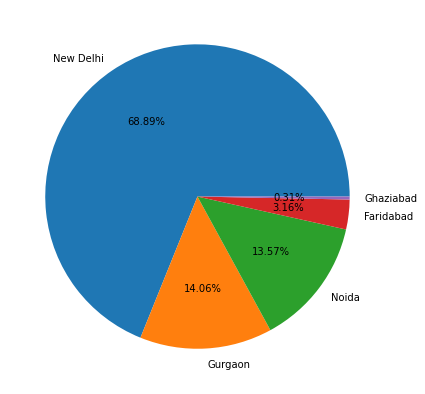

In [0]:
plt.pie(x=City_values[:5],labels=City_labels[:5],autopct="%1.2f%%")

In [0]:
#A pie chart for top 5 cities distribution

In [0]:
cuisines = new_df.select('Cuisines','Aggregate rating')

In [0]:
from pyspark.sql.functions import *

In [0]:
###Find the top 10 Cuisines
cuisines.orderBy(col('Aggregate rating').desc()).limit(10).show()

+--------------------+----------------+
|            Cuisines|Aggregate rating|
+--------------------+----------------+
|American, Caribbe...|             4.9|
|Burger, Bar Food,...|             4.9|
|              Burger|             4.9|
|     Japanese, Sushi|             4.9|
|BBQ, Breakfast, S...|             4.9|
| Brazilian, Bar Food|             4.9|
|               Asian|             4.9|
| Brazilian, Bar Food|             4.9|
|American, Coffee ...|             4.9|
|Sandwich, Seafood...|             4.9|
+--------------------+----------------+



In [0]:
no_of_cuisines = new_df.select("Cuisines").groupby("Cuisines").count().withColumnRenamed("count","no_of_cusines_count")

In [0]:
#Top 10 cuisines based on order
no_of_cuisines.orderBy(col("no_of_cusines_count").desc()).limit(10).show()

+--------------------+-------------------+
|            Cuisines|no_of_cusines_count|
+--------------------+-------------------+
|        North Indian|                936|
|North Indian, Chi...|                511|
|             Chinese|                354|
|           Fast Food|                354|
|North Indian, Mug...|                334|
|                Cafe|                299|
|              Bakery|                218|
|North Indian, Mug...|                197|
|    Bakery, Desserts|                170|
|         Street Food|                149|
+--------------------+-------------------+

